<a href="https://colab.research.google.com/github/sdulce/Simulated-Data-Creation/blob/main/Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files


uploaded = files.upload()


Saving luxury_dealership_sales_data.csv to luxury_dealership_sales_data.csv


In [ ]:
# prompt: create a dataframe using pandas and the csv file

import pandas as pd
import io

df = pd.read_csv(io.BytesIO(uploaded['luxury_dealership_sales_data.csv']))
print(df)

              Date   Time  StoreID  CustomerID  OrderID  Car Brand & Model  \
0       2024-09-19  08:48     1173         177     4285      Porsche Coupe   
1       2024-09-19  08:48     1173         177     4285     Mercedes Sedan   
2       2024-04-08  15:06     1173         934     3618        Lexus Sedan   
3       2024-04-08  15:06     1173         934     3618     Mercedes Sedan   
4       2024-04-08  15:06     1173         934     3618          BMW Coupe   
...            ...    ...      ...         ...      ...                ...   
848934  2024-06-25  18:21      159         945     2748       Mercedes SUV   
848935  2024-06-25  18:21      159         945     2748        Lexus Coupe   
848936  2024-06-25  18:21      159         945     2748  Lexus Convertible   
848937  2024-03-16  10:01      159         226     2246        Lexus Coupe   
848938  2024-06-21  15:21      159         863     6593            BMW SUV   

       Paint Color   Price  
0            White   81478  
1    

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 848939 entries, 0 to 848938
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Date               848939 non-null  object
 1   Time               848939 non-null  object
 2   StoreID            848939 non-null  int64 
 3   CustomerID         848939 non-null  int64 
 4   OrderID            848939 non-null  int64 
 5   Car Brand & Model  848939 non-null  object
 6   Paint Color        848939 non-null  object
 7   Price              848939 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 51.8+ MB


In [ ]:
# 1. Find the top brands
# Split 'Car Brand & Model' into separate columns for brand and model
df[['Brand', 'Model']] = df['Car Brand & Model'].str.split(' ', n=1, expand=True)

# Top Brands by Sales Count
top_brands = df['Brand'].value_counts().reset_index()
top_brands.columns = ['Brand', 'Sales Count']
print("Top Car Brands by Sales:")
print(top_brands.head())

# 2. Find the top models
top_models = df['Model'].value_counts().reset_index()
top_models.columns = ['Model', 'Sales Count']
print("\nTop Car Models by Sales:")
print(top_models.head())

# 3. Find the top paint colors
top_paints = df['Paint Color'].value_counts().reset_index()
top_paints.columns = ['Paint Color', 'Sales Count']
print("\nTop Car Paint Colors by Sales:")
print(top_paints.head())

Top Car Brands by Sales:
      Brand  Sales Count
0   Porsche       218754
1  Mercedes       212150
2     Lexus       210333
3       BMW       207702

Top Car Models by Sales:
         Model  Sales Count
0        Sedan       220097
1  Convertible       215125
2        Coupe       210126
3          SUV       203591

Top Car Paint Colors by Sales:
  Paint Color  Sales Count
0      Silver       173065
1         Red       172184
2       White       170377
3        Grey       166965
4       Black       166348


In [ ]:
# Create a new column that combines brand, model, and paint color
df['Full Car Description'] = df['Car Brand & Model'] + ' (' + df['Paint Color'] + ')'

# Count the occurrences of each full car description
top_cars = df['Full Car Description'].value_counts().reset_index()
top_cars.columns = ['Full Car Description', 'Sales Count']

# Get the top 5 most sold cars
top_5_cars = top_cars.head(5)

# Display the results
print("Top 5 Most Sold Cars:")
print(top_5_cars)

Top 5 Most Sold Cars:
          Full Car Description  Sales Count
0         Porsche SUV (Silver)        13762
1          Porsche Sedan (Red)        13061
2  Mercedes Convertible (Grey)        12873
3    Porsche Convertible (Red)        12677
4        Porsche Sedan (Black)        12655


In [ ]:
# Group by CustomerID and count purchases
customer_summary = df.groupby('CustomerID').agg(
    Total_Cars=('Car Brand & Model', 'count')  # Total cars purchased
).reset_index()

# Calculate the 90th percentile for Total_Cars
top_10_percent_threshold = customer_summary['Total_Cars'].quantile(0.90)

# Identify the top 10% largest buyers
top_10_percent_buyers = customer_summary[customer_summary['Total_Cars'] >= top_10_percent_threshold]

# Display the results
print(f"Top 10% Buyer Threshold: {top_10_percent_threshold:.2f}")
print("Top 10% Largest Buyers:")
print(top_10_percent_buyers)

Top 10% Buyer Threshold: 909.00
Top 10% Largest Buyers:
     CustomerID  Total_Cars
3             4         909
9            10         991
13           14         913
26           27         925
28           29         909
..          ...         ...
978         979         919
980         981         914
994         995         936
996         997         938
997         998         913

[102 rows x 2 columns]


In [ ]:
# Group by CustomerID and count purchases
customer_summary = df.groupby('CustomerID').agg(
    Total_Cars=('Car Brand & Model', 'count')  # Total cars purchased
).reset_index()

# Calculate the 90th percentile for Total_Cars
top_10_percent_threshold = customer_summary['Total_Cars'].quantile(0.90)

# Identify the large-basket buyers
large_basket_buyers = customer_summary[customer_summary['Total_Cars'] >= top_10_percent_threshold]

# Merge back with the original DataFrame to get store information
large_basket_orders = df[df['CustomerID'].isin(large_basket_buyers['CustomerID'])]

# Group by StoreID and sum the Total_Cars for large-basket buyers
store_summary = large_basket_orders.groupby('StoreID').agg(
    Total_Cars_Sold=('Car Brand & Model', 'count'),
    Unique_Buyers=('CustomerID', 'nunique')  # Count unique large-basket buyers in each store
).reset_index()

# Sort the summary by Total_Cars_Sold in descending order
store_summary = store_summary.sort_values(by='Total_Cars_Sold', ascending=False)

# Display the results
print(f"Top 10% Buyer Threshold: {top_10_percent_threshold:.2f}")
print("Stores with Large-Basket Buyers (Sorted by Total Cars Sold):")
print(store_summary)

Top 10% Buyer Threshold: 909.00
Stores with Large-Basket Buyers (Sorted by Total Cars Sold):
     StoreID  Total_Cars_Sold  Unique_Buyers
502     1779              529             95
43       135              481             90
404     1397              480             95
24        63              431             89
518     1822              427             90
..       ...              ...            ...
175      632                3              2
606     2135                3              1
525     1842                3              1
605     2134                2              1
514     1813                2              1

[710 rows x 3 columns]


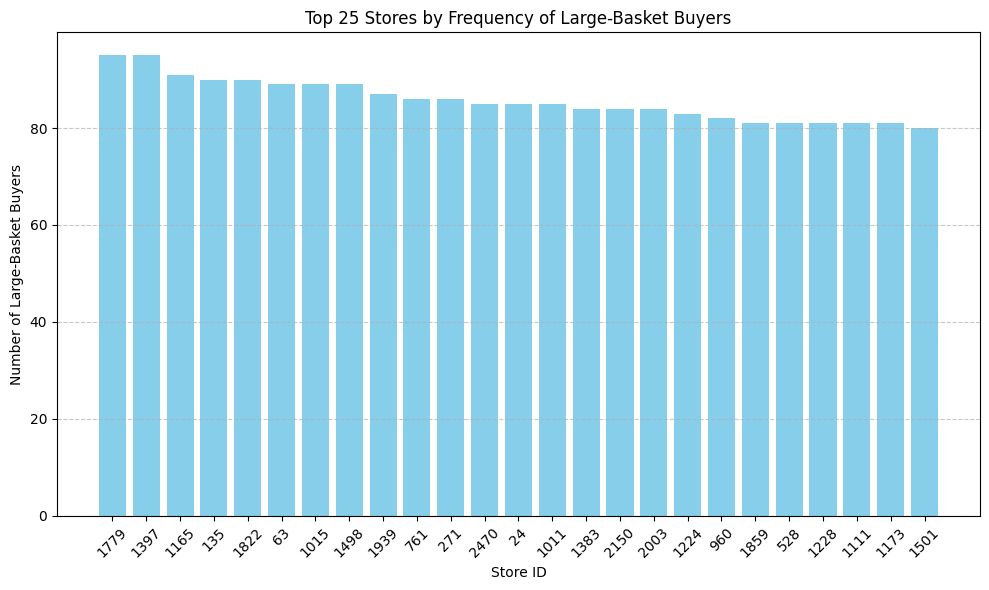

In [ ]:
import matplotlib.pyplot as plt

# Load the CSV data into a DataFrame
df = pd.read_csv('luxury_dealership_sales_data.csv')

# Group by CustomerID and count purchases
customer_summary = df.groupby('CustomerID').agg(
    Total_Cars=('Car Brand & Model', 'count')  # Total cars purchased
).reset_index()

# Calculate the 90th percentile for Total_Cars
top_10_percent_threshold = customer_summary['Total_Cars'].quantile(0.90)

# Identify the large-basket buyers
large_basket_buyers = customer_summary[customer_summary['Total_Cars'] >= top_10_percent_threshold]

# Merge back with the original DataFrame to get store information
large_basket_orders = df[df['CustomerID'].isin(large_basket_buyers['CustomerID'])]

# Group by StoreID and count frequency of large-basket buyers
store_summary = large_basket_orders.groupby('StoreID').agg(
    Frequency=('CustomerID', 'nunique')  # Count unique large-basket buyers in each store
).reset_index()

# Sort the summary by Frequency in descending order
store_summary = store_summary.sort_values(by='Frequency', ascending=False)

# Limit to the top 25 stores
top_25_stores = store_summary.head(25)

# Visualization
plt.figure(figsize=(10, 6))
plt.bar(top_25_stores['StoreID'].astype(str), top_25_stores['Frequency'], color='skyblue')
plt.xlabel('Store ID')
plt.ylabel('Number of Large-Basket Buyers')
plt.title('Top 25 Stores by Frequency of Large-Basket Buyers')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
# Load the existing sales data from the CSV file
sales_data = pd.read_csv("luxury_dealership_sales_data.csv")

# Generate random demographics
rich_countries = ["USA", "Canada", "Germany", "France", "Australia", "Japan"]

def generate_random_demographics(num_entries):
    # Generate random ages between 35 and 75
    ages = [random.randint(35, 75) for _ in range(num_entries)]
    # Select random countries from the list of rich countries
    countries = [random.choice(rich_countries) for _ in range(num_entries)]
    return ages, countries

# Generate random demographics for each entry in the sales data
ages, countries = generate_random_demographics(len(sales_data))

# Add the demographics to the DataFrame
sales_data['Age'] = ages
sales_data['Country'] = countries

# Save the updated DataFrame back to the CSV file
sales_data.to_csv("luxury_dealership_sales_data_with_demographics.csv", index=False)

print("Demographics added to the DataFrame and saved to the new CSV file.")

Demographics added to the DataFrame and saved to the new CSV file.


In [ ]:
print(sales_data.head())

         Date   Time  StoreID  CustomerID  OrderID Car Brand & Model  \
0  2024-09-19  08:48     1173         177     4285     Porsche Coupe   
1  2024-09-19  08:48     1173         177     4285    Mercedes Sedan   
2  2024-04-08  15:06     1173         934     3618       Lexus Sedan   
3  2024-04-08  15:06     1173         934     3618    Mercedes Sedan   
4  2024-04-08  15:06     1173         934     3618         BMW Coupe   

  Paint Color  Price  Age    Country  
0       White  81478   71        USA  
1       Black  37961   41     France  
2        Grey  65282   54  Australia  
3      Silver  65127   35      Japan  
4        Grey  75873   70  Australia  


In [ ]:
# prompt: tell me the top list of products along with the demographic that bought that product the most

# Assuming you have the sales_data DataFrame with 'Car Brand & Model', 'Age', and 'Country' columns

# Group by 'Car Brand & Model', 'Age', and 'Country' to count sales for each combination
product_sales = sales_data.groupby(['Car Brand & Model', 'Age', 'Country']).size().reset_index(name='Total Sales')

# Find the total sales for each product
top_products = product_sales.groupby('Car Brand & Model').agg({'Total Sales': 'sum'}).reset_index()
top_products = top_products.sort_values(by='Total Sales', ascending=False)

# Find the demographic that bought each product the most
top_demographics = product_sales.loc[product_sales.groupby('Car Brand & Model')['Total Sales'].idxmax()]

# Merge top products with their top demographics
top_products = top_products.merge(top_demographics[['Car Brand & Model', 'Age', 'Country']], on='Car Brand & Model')

# Sort by total sales in descending order
final_result = top_products.sort_values(by='Total Sales', ascending=False)

# Print the final result
final_result

,Car Brand & Model,Total Sales,Age,Country
0,Porsche Sedan,57940,43,Germany
1,Mercedes Convertible,56150,35,Japan
2,Lexus Sedan,54950,36,Canada
3,BMW Convertible,54616,70,Japan
4,Porsche SUV,54533,37,Australia
5,Porsche Coupe,54322,39,USA
6,BMW Sedan,53976,44,France
7,BMW Coupe,53442,73,Japan
8,Mercedes Sedan,53231,42,Australia
9,Lexus Convertible,52400,65,France


In [ ]:
# prompt: tell me the top most sold cars along with the demographic that bought that product the most

# Assuming you have the sales_data DataFrame with 'Car Brand & Model', 'Age', and 'Country' columns

# Group by 'Car Brand & Model', 'Age', and 'Country' to count sales for each combination
product_sales = sales_data.groupby(['Car Brand & Model', 'Age', 'Country']).size().reset_index(name='Total Sales')

# Find the total sales for each product
top_products = product_sales.groupby('Car Brand & Model').agg({'Total Sales': 'sum'}).reset_index()
top_products = top_products.sort_values(by='Total Sales', ascending=False)

# Find the demographic that bought each product the most
top_demographics = product_sales.loc[product_sales.groupby('Car Brand & Model')['Total Sales'].idxmax()]

# Merge top products with their top demographics
top_products = top_products.merge(top_demographics[['Car Brand & Model', 'Age', 'Country']], on='Car Brand & Model')

# Sort by total sales in descending order
final_result = top_products.sort_values(by='Total Sales', ascending=False)

# Print the final result
final_result

,Car Brand & Model,Total Sales,Age,Country
0,Porsche Sedan,57940,43,Germany
1,Mercedes Convertible,56150,35,Japan
2,Lexus Sedan,54950,36,Canada
3,BMW Convertible,54616,70,Japan
4,Porsche SUV,54533,37,Australia
5,Porsche Coupe,54322,39,USA
6,BMW Sedan,53976,44,France
7,BMW Coupe,53442,73,Japan
8,Mercedes Sedan,53231,42,Australia
9,Lexus Convertible,52400,65,France


In [ ]:
# prompt:  create age groups under each country and determine which product is bought most for each age group per country.  each age group can be split every 10 years.  Example: 35-45, 45-55, 55-65, 65-75.  each age group along with each country

import pandas as pd
import random

# Assuming you have the sales_data DataFrame with 'Car Brand & Model', 'Age', and 'Country' columns

# Create age groups
bins = [30, 40, 50, 60, 70, 80]
labels = ['30-39', '40-49', '50-59', '60-69', '70-79']
sales_data['Age Group'] = pd.cut(sales_data['Age'], bins=bins, labels=labels, right=False)

# Group by country, age group, and car brand to count sales
product_sales_by_group = sales_data.groupby(['Country', 'Age Group', 'Car Brand & Model'])['Car Brand & Model'].count().reset_index(name='Total Sales')

# Find the most popular product for each age group in each country
most_popular_products = product_sales_by_group.loc[product_sales_by_group.groupby(['Country', 'Age Group'])['Total Sales'].idxmax()]

most_popular_products

<ipython-input-38-1a232595c628>:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  product_sales_by_group = sales_data.groupby(['Country', 'Age Group', 'Car Brand & Model'])['Car Brand & Model'].count().reset_index(name='Total Sales')
<ipython-input-38-1a232595c628>:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  most_popular_products = product_sales_by_group.loc[product_sales_by_group.groupby(['Country', 'Age Group'])['Total Sales'].idxmax()]


,Country,Age Group,Car Brand & Model,Total Sales
15,Australia,30-39,Porsche Sedan,1255
24,Australia,40-49,Mercedes Convertible,2298
47,Australia,50-59,Porsche Sedan,2344
63,Australia,60-69,Porsche Sedan,2333
79,Australia,70-79,Porsche Sedan,1450
88,Canada,30-39,Mercedes Convertible,1193
111,Canada,40-49,Porsche Sedan,2445
120,Canada,50-59,Mercedes Convertible,2397
143,Canada,60-69,Porsche Sedan,2396
152,Canada,70-79,Mercedes Convertible,1396


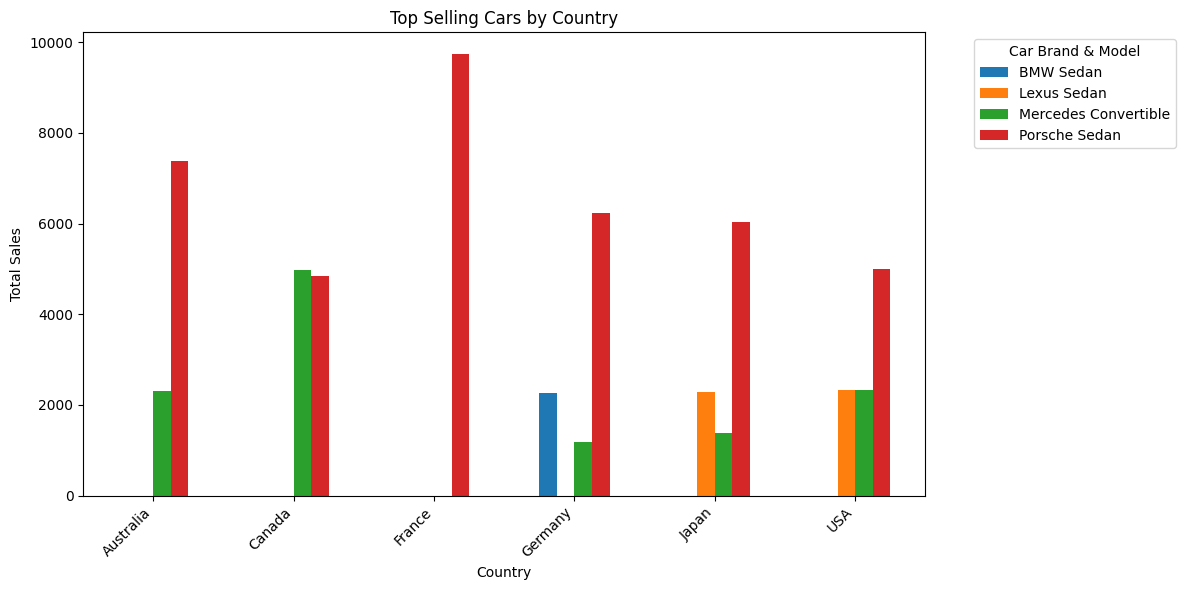

In [ ]:
# prompt: based off the previous prompt, create 1 graph that showcases, the top selling cars, each country, and the amount of cars from each country

import matplotlib.pyplot as plt

# Assuming you have the 'most_popular_products' DataFrame as calculated in the previous code.

# Group data for plotting
country_car_sales = most_popular_products.groupby(['Country', 'Car Brand & Model'])['Total Sales'].sum().unstack()

# Plot the bar chart
country_car_sales.plot(kind='bar', figsize=(12, 6))
plt.title('Top Selling Cars by Country')
plt.xlabel('Country')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Car Brand & Model', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()